In [2]:
#keras is a deep learning library
from keras.datasets import cifar10
#use .load_data() method to download the data and store it in keras directory
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#shape of training and testing images
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

170500096/170498071 [==============================] - 27s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [3]:
#shape of labels
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [5]:
#unique numbers from train labels

import numpy as np
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs:', nClasses)
print('Output classes: ', classes)


Total number of outputs: 10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


In [8]:
import matplotlib.pyplot as plt
#helps to tell jupyter notebook to show output within notebook itself
%matplotlib inline



In [9]:
label_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


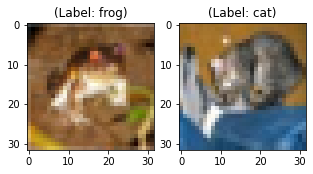

In [12]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


In [13]:
#normalize the pixel between 0 and 1
np.min(x_train),np.max(x_train)


(0, 255)

In [14]:
x_train = x_train/255.0

In [15]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
#reshape image dimensions from 3 to 1
x_train_flat = x_train.reshape(-1,3072)

In [19]:
#Create DF that holds pixel values for the images
import pandas as pd
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [20]:
df_cifar.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.54902,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6


In [22]:
#Create a PCA method and pass number of components to two and apply fit_transform
from sklearn.decomposition import PCA
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [23]:
#Convert from numpy array to DF
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [24]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [25]:
#find the amount of information or varience the principal components holds.
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

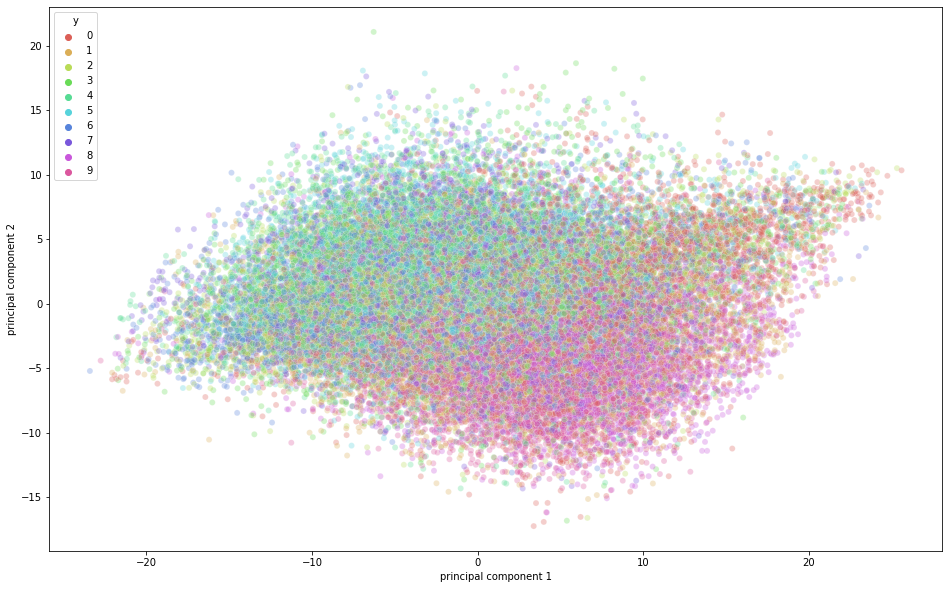

In [26]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [ ]:
Looks the there is some semantic class overlap in the dataset, i.e., frog can have a slightly similar shape of a cat or a deer with a dog when plotted. Difference between them is not clearly captured. 


# Deep learning with PCA with CIFAR-10 dataset. 

Normalize the training and testing images first. 
Training is already done, so just proceed with testing images normalization.  

In [27]:
x_test = x_test/255.0

In [28]:
x_test = x_test.reshape(-1,32,32,3)

In [29]:
#reshape the test data
x_test_flat = x_test.reshape(-1,3072)

In [30]:
#create pca instance and pass the percentage of variance needed instead of n_components. 
pca = PCA(0.9)
#fit the pca instance on training images
pca.fit(x_train_flat)

PCA(n_components=0.9)

In [31]:
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

In [32]:
pca.n_components_

99

Dimension is reduced to 99 principal components from 3072, to acheive 90% variance. 

In [34]:
#apply transform on both training and test set to generate a transformed dataset from the 
#parameters generated from the fit method.
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [35]:
#required libraries to run deep learning model.
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

In [36]:
#convert training and testing labels to one-hot encoding vectors
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [39]:
#Define number of epochs, number of classes, batch_size for the model. 
batch_size = 128
num_classes = 10
epochs = 20

In [40]:
#define sequential model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              102400    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [42]:
#compile and train model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 15s 35ms/step - loss: 1.8233 - accuracy: 0.3593 - val_loss: 1.4426 - val_accuracy: 0.4806
Epoch 2/20
391/391 [==============================] - 13s 34ms/step - loss: 1.3347 - accuracy: 0.5241 - val_loss: 1.3061 - val_accuracy: 0.5439
Epoch 3/20
391/391 [==============================] - 13s 33ms/step - loss: 1.1375 - accuracy: 0.5954 - val_loss: 1.2669 - val_accuracy: 0.5555
Epoch 4/20
391/391 [==============================] - 12s 31ms/step - loss: 0.9626 - accuracy: 0.6520 - val_loss: 1.3239 - val_accuracy: 0.5475
Epoch 5/20
391/391 [==============================] - 13s 32ms/step - loss: 0.8086 - accuracy: 0.7080 - val_loss: 1.3942 - val_accuracy: 0.5672
Epoch 6/20
391/391 [==============================] - 13s 33ms/step - loss: 0.6647 - accuracy: 0.7589 - val_loss: 1.5882 - val_accuracy: 0.5493
Epoch 7/20
391/391 [==============================] - 12s 31ms/step - loss: 0.5391 - accuracy: 0.8084 - val_loss: 1.6829 - val_accuracy:

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))